In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras import losses
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
import xlsxwriter



#Bring in all data for all years. This notebook contains Joseph's classifiers from 0-3 for risk groups. Col 151 is risk groups.
ct_sheet = pd.ExcelFile("SA_and_CT_AALandfROI_08272019.xlsx") 

Using TensorFlow backend.


In [2]:
print(ct_sheet.sheet_names[10])

Destrieux_SA


W1122 10:33:51.334289 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1122 10:33:51.371660 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1122 10:33:51.380637 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



(1889, 148)
Tensor("input_1:0", shape=(?, 148), dtype=float32)


W1122 10:33:51.566565 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1122 10:33:51.764798 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1122 10:33:52.156803 19860 deprecation_wrapper.py:119] From C:\Users\mattbeze\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1700 samples, validate on 189 samples
Epoch 1/1500
1700/1700 [==============================] - 2s 1ms/step - loss: 0.1146 - val_loss: 0.0867
Epoch 2/1500
1700/1700 [==============================] - 1s 423us/step - loss: 0.0859 - val_loss: 0.0841
Epoch 3/1500
1700/1700 [==============================] - 1s 417us/step - loss: 0.0836 - val_loss: 0.0833
Epoch 4/1500
1700/1700 [==============================] - 1s 416us/step - loss: 0.0811 - val_loss: 0.0812
Epoch 5/1500
1700/1700 [==============================] - 1s 392us/step - loss: 0.0800 - val_loss: 0.0785
Epoch 6/1500
1700/1700 [==============================] - 1s 531us/step - loss: 0.0780 - val_loss: 0.0786
Epoch 7/1500
1700/1700 [==============================] - 1s 386us/step - loss: 0.0763 - val_loss: 0.0753
Epoch 8/1500
1700/1700 [==============================] - 1s 396us/step - loss: 0.0751 - val_loss: 0.0752
Epoch 9/1500
1700/1700 [==============================] - 1s 460us/step - loss: 0.0743 - val_loss: 0.0752
E

1700/1700 [==============================] - 1s 609us/step - loss: 0.0650 - val_loss: 0.0671
Epoch 78/1500
1700/1700 [==============================] - 1s 406us/step - loss: 0.0650 - val_loss: 0.0671
Epoch 79/1500
1700/1700 [==============================] - 1s 399us/step - loss: 0.0650 - val_loss: 0.0666
Epoch 80/1500
1700/1700 [==============================] - 1s 398us/step - loss: 0.0649 - val_loss: 0.0679
Epoch 81/1500
1700/1700 [==============================] - 1s 467us/step - loss: 0.0653 - val_loss: 0.0674
Epoch 82/1500
1700/1700 [==============================] - 1s 406us/step - loss: 0.0649 - val_loss: 0.0667
Epoch 83/1500
1700/1700 [==============================] - 1s 417us/step - loss: 0.0649 - val_loss: 0.0672
Epoch 84/1500
1700/1700 [==============================] - 1s 393us/step - loss: 0.0649 - val_loss: 0.0669
Epoch 85/1500
1700/1700 [==============================] - 1s 400us/step - loss: 0.0648 - val_loss: 0.0667
Epoch 86/1500
1700/1700 [==========================

1700/1700 [==============================] - 1s 396us/step - loss: 0.0641 - val_loss: 0.0657
Epoch 153/1500
1700/1700 [==============================] - ETA: 0s - loss: 0.063 - 1s 382us/step - loss: 0.0640 - val_loss: 0.0655
Epoch 154/1500
1700/1700 [==============================] - 1s 404us/step - loss: 0.0641 - val_loss: 0.0681
Epoch 155/1500
1700/1700 [==============================] - 1s 406us/step - loss: 0.0650 - val_loss: 0.0661
Epoch 156/1500
1700/1700 [==============================] - 1s 448us/step - loss: 0.0642 - val_loss: 0.0662
Epoch 157/1500
1700/1700 [==============================] - 1s 413us/step - loss: 0.0645 - val_loss: 0.0659
Epoch 158/1500
1700/1700 [==============================] - 1s 384us/step - loss: 0.0639 - val_loss: 0.0656
Epoch 159/1500
1700/1700 [==============================] - 1s 483us/step - loss: 0.0639 - val_loss: 0.0657
Epoch 160/1500
1700/1700 [==============================] - 1s 746us/step - loss: 0.0641 - val_loss: 0.0663
Epoch 161/1500
1700

1700/1700 [==============================] - 1s 376us/step - loss: 0.0636 - val_loss: 0.0657
Epoch 228/1500
1700/1700 [==============================] - 1s 341us/step - loss: 0.0638 - val_loss: 0.0657
Epoch 229/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0636 - val_loss: 0.0660
Epoch 230/1500
1700/1700 [==============================] - 1s 326us/step - loss: 0.0635 - val_loss: 0.0675
Epoch 231/1500
1700/1700 [==============================] - 1s 308us/step - loss: 0.0636 - val_loss: 0.0659
Epoch 232/1500
1700/1700 [==============================] - 1s 580us/step - loss: 0.0636 - val_loss: 0.0660
Epoch 233/1500
1700/1700 [==============================] - 1s 422us/step - loss: 0.0636 - val_loss: 0.0664
Epoch 234/1500
1700/1700 [==============================] - 1s 326us/step - loss: 0.0637 - val_loss: 0.0656
Epoch 235/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0636 - val_loss: 0.0660
Epoch 236/1500
1700/1700 [=================

Epoch 303/1500
1700/1700 [==============================] - 1s 321us/step - loss: 0.0633 - val_loss: 0.0657
Epoch 304/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0633 - val_loss: 0.0660
Epoch 305/1500
1700/1700 [==============================] - 1s 322us/step - loss: 0.0634 - val_loss: 0.0659
Epoch 306/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0634 - val_loss: 0.0662
Epoch 307/1500
1700/1700 [==============================] - 1s 335us/step - loss: 0.0634 - val_loss: 0.0658
Epoch 308/1500
1700/1700 [==============================] - 1s 304us/step - loss: 0.0636 - val_loss: 0.0659
Epoch 309/1500
1700/1700 [==============================] - 1s 334us/step - loss: 0.0636 - val_loss: 0.0656
Epoch 310/1500
1700/1700 [==============================] - 1s 431us/step - loss: 0.0631 - val_loss: 0.0659
Epoch 311/1500
1700/1700 [==============================] - 1s 628us/step - loss: 0.0632 - val_loss: 0.0658
Epoch 312/1500
1700/1700 [==

Epoch 379/1500
1700/1700 [==============================] - 1s 341us/step - loss: 0.0633 - val_loss: 0.0661
Epoch 380/1500
1700/1700 [==============================] - 1s 334us/step - loss: 0.0630 - val_loss: 0.0658
Epoch 381/1500
1700/1700 [==============================] - 1s 354us/step - loss: 0.0631 - val_loss: 0.0658
Epoch 382/1500
1700/1700 [==============================] - 1s 344us/step - loss: 0.0631 - val_loss: 0.0657
Epoch 383/1500
1700/1700 [==============================] - 1s 354us/step - loss: 0.0631 - val_loss: 0.0662
Epoch 384/1500
1700/1700 [==============================] - 1s 344us/step - loss: 0.0632 - val_loss: 0.0659
Epoch 385/1500
1700/1700 [==============================] - 1s 431us/step - loss: 0.0630 - val_loss: 0.0659
Epoch 386/1500
1700/1700 [==============================] - 1s 358us/step - loss: 0.0631 - val_loss: 0.0662
Epoch 387/1500
1700/1700 [==============================] - 1s 322us/step - loss: 0.0631 - val_loss: 0.0662
Epoch 388/1500
1700/1700 [==

Epoch 455/1500
1700/1700 [==============================] - 1s 344us/step - loss: 0.0630 - val_loss: 0.0661
Epoch 456/1500
1700/1700 [==============================] - 1s 317us/step - loss: 0.0629 - val_loss: 0.0658
Epoch 457/1500
1700/1700 [==============================] - 1s 332us/step - loss: 0.0628 - val_loss: 0.0656
Epoch 458/1500
1700/1700 [==============================] - 1s 335us/step - loss: 0.0630 - val_loss: 0.0658
Epoch 459/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0628 - val_loss: 0.0660
Epoch 460/1500
1700/1700 [==============================] - 1s 378us/step - loss: 0.0628 - val_loss: 0.0658
Epoch 461/1500
1700/1700 [==============================] - 1s 391us/step - loss: 0.0629 - val_loss: 0.0658
Epoch 462/1500
1700/1700 [==============================] - 1s 335us/step - loss: 0.0629 - val_loss: 0.0658
Epoch 463/1500
1700/1700 [==============================] - 1s 313us/step - loss: 0.0630 - val_loss: 0.0659
Epoch 464/1500
1700/1700 [==

Epoch 531/1500
1700/1700 [==============================] - 1s 376us/step - loss: 0.0627 - val_loss: 0.0660
Epoch 532/1500
1700/1700 [==============================] - 1s 332us/step - loss: 0.0628 - val_loss: 0.0659
Epoch 533/1500
1700/1700 [==============================] - 1s 317us/step - loss: 0.0628 - val_loss: 0.0661
Epoch 534/1500
1700/1700 [==============================] - 1s 354us/step - loss: 0.0626 - val_loss: 0.0656
Epoch 535/1500
1700/1700 [==============================] - 1s 363us/step - loss: 0.0626 - val_loss: 0.0657
Epoch 536/1500
1700/1700 [==============================] - 1s 394us/step - loss: 0.0629 - val_loss: 0.0661
Epoch 537/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0628 - val_loss: 0.0657
Epoch 538/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0626 - val_loss: 0.0659
Epoch 539/1500
1700/1700 [==============================] - 1s 354us/step - loss: 0.0626 - val_loss: 0.0657
Epoch 540/1500
1700/1700 [==

1700/1700 [==============================] - 1s 345us/step - loss: 0.0626 - val_loss: 0.0659
Epoch 607/1500
1700/1700 [==============================] - 1s 337us/step - loss: 0.0627 - val_loss: 0.0661
Epoch 608/1500
1700/1700 [==============================] - 1s 357us/step - loss: 0.0626 - val_loss: 0.0659
Epoch 609/1500
1700/1700 [==============================] - 1s 373us/step - loss: 0.0626 - val_loss: 0.0661
Epoch 610/1500
1700/1700 [==============================] - 1s 341us/step - loss: 0.0626 - val_loss: 0.0658
Epoch 611/1500
1700/1700 [==============================] - 1s 417us/step - loss: 0.0624 - val_loss: 0.0659
Epoch 612/1500
1700/1700 [==============================] - 1s 413us/step - loss: 0.0626 - val_loss: 0.0657
Epoch 613/1500
1700/1700 [==============================] - 1s 350us/step - loss: 0.0624 - val_loss: 0.0657
Epoch 614/1500
1700/1700 [==============================] - 1s 326us/step - loss: 0.0625 - val_loss: 0.0660
Epoch 615/1500
1700/1700 [=================

Epoch 682/1500
1700/1700 [==============================] - 1s 335us/step - loss: 0.0624 - val_loss: 0.0659
Epoch 683/1500
1700/1700 [==============================] - 1s 354us/step - loss: 0.0623 - val_loss: 0.0659
Epoch 684/1500
1700/1700 [==============================] - 1s 344us/step - loss: 0.0624 - val_loss: 0.0662
Epoch 685/1500
1700/1700 [==============================] - 1s 335us/step - loss: 0.0624 - val_loss: 0.0661
Epoch 686/1500
1700/1700 [==============================] - 1s 331us/step - loss: 0.0625 - val_loss: 0.0660
Epoch 687/1500
1700/1700 [==============================] - 1s 363us/step - loss: 0.0627 - val_loss: 0.0657
Epoch 688/1500
1700/1700 [==============================] - 1s 332us/step - loss: 0.0625 - val_loss: 0.0660
Epoch 689/1500
1700/1700 [==============================] - 1s 344us/step - loss: 0.0625 - val_loss: 0.0658
Epoch 690/1500
1700/1700 [==============================] - 1s 400us/step - loss: 0.0625 - val_loss: 0.0661
Epoch 691/1500
1700/1700 [==

Epoch 758/1500
1700/1700 [==============================] - 1s 331us/step - loss: 0.0626 - val_loss: 0.0662
Epoch 759/1500
1700/1700 [==============================] - 1s 326us/step - loss: 0.0623 - val_loss: 0.0664
Epoch 760/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0626 - val_loss: 0.0659
Epoch 761/1500
1700/1700 [==============================] - 1s 372us/step - loss: 0.0625 - val_loss: 0.0659
Epoch 762/1500
1700/1700 [==============================] - 1s 326us/step - loss: 0.0624 - val_loss: 0.0661
Epoch 763/1500
1700/1700 [==============================] - 1s 324us/step - loss: 0.0623 - val_loss: 0.0658
Epoch 764/1500
1700/1700 [==============================] - 1s 342us/step - loss: 0.0622 - val_loss: 0.0661
Epoch 765/1500
1700/1700 [==============================] - 1s 404us/step - loss: 0.0624 - val_loss: 0.0659
Epoch 766/1500
1700/1700 [==============================] - 1s 345us/step - loss: 0.0622 - val_loss: 0.0659
Epoch 767/1500
1700/1700 [==

1700/1700 [==============================] - 1s 593us/step - loss: 0.0622 - val_loss: 0.0661
Epoch 834/1500
1700/1700 [==============================] - 1s 623us/step - loss: 0.0622 - val_loss: 0.0660
Epoch 835/1500
1700/1700 [==============================] - 1s 616us/step - loss: 0.0623 - val_loss: 0.0660
Epoch 836/1500
1700/1700 [==============================] - 1s 696us/step - loss: 0.0624 - val_loss: 0.0662
Epoch 837/1500
1700/1700 [==============================] - 1s 707us/step - loss: 0.0624 - val_loss: 0.0660
Epoch 838/1500
1700/1700 [==============================] - 1s 603us/step - loss: 0.0622 - val_loss: 0.0660
Epoch 839/1500
1700/1700 [==============================] - 1s 617us/step - loss: 0.0621 - val_loss: 0.0660
Epoch 840/1500
1700/1700 [==============================] - 1s 681us/step - loss: 0.0622 - val_loss: 0.0661
Epoch 841/1500
1700/1700 [==============================] - 1s 710us/step - loss: 0.0623 - val_loss: 0.0661
Epoch 842/1500
1700/1700 [=================

Epoch 909/1500
1700/1700 [==============================] - 1s 624us/step - loss: 0.0622 - val_loss: 0.0662
Epoch 910/1500
1700/1700 [==============================] - ETA: 0s - loss: 0.062 - 1s 669us/step - loss: 0.0622 - val_loss: 0.0662
Epoch 911/1500
1700/1700 [==============================] - 1s 852us/step - loss: 0.0620 - val_loss: 0.0663
Epoch 912/1500
1700/1700 [==============================] - 1s 633us/step - loss: 0.0622 - val_loss: 0.0662
Epoch 913/1500
1700/1700 [==============================] - 1s 638us/step - loss: 0.0621 - val_loss: 0.0660
Epoch 914/1500
1700/1700 [==============================] - 1s 605us/step - loss: 0.0621 - val_loss: 0.0663
Epoch 915/1500
1700/1700 [==============================] - 1s 571us/step - loss: 0.0621 - val_loss: 0.0663
Epoch 916/1500
1700/1700 [==============================] - 1s 618us/step - loss: 0.0620 - val_loss: 0.0662
Epoch 917/1500
1700/1700 [==============================] - 1s 693us/step - loss: 0.0622 - val_loss: 0.0665
Epoc

1700/1700 [==============================] - 1s 750us/step - loss: 0.0620 - val_loss: 0.0661
Epoch 985/1500
1700/1700 [==============================] - 1s 730us/step - loss: 0.0619 - val_loss: 0.0664
Epoch 986/1500
1700/1700 [==============================] - 1s 611us/step - loss: 0.0621 - val_loss: 0.0663
Epoch 987/1500
1700/1700 [==============================] - 1s 646us/step - loss: 0.0620 - val_loss: 0.0662
Epoch 988/1500
1700/1700 [==============================] - 1s 605us/step - loss: 0.0622 - val_loss: 0.0659
Epoch 989/1500
1700/1700 [==============================] - 1s 669us/step - loss: 0.0620 - val_loss: 0.0664
Epoch 990/1500
1700/1700 [==============================] - 1s 669us/step - loss: 0.0621 - val_loss: 0.0662
Epoch 991/1500
1700/1700 [==============================] - 1s 661us/step - loss: 0.0620 - val_loss: 0.0663
Epoch 992/1500
1700/1700 [==============================] - 1s 671us/step - loss: 0.0619 - val_loss: 0.0660
Epoch 993/1500
1700/1700 [=================

1700/1700 [==============================] - 1s 837us/step - loss: 0.0619 - val_loss: 0.0663
Epoch 1060/1500
1700/1700 [==============================] - 1s 456us/step - loss: 0.0622 - val_loss: 0.0665
Epoch 1061/1500
1700/1700 [==============================] - 1s 471us/step - loss: 0.0622 - val_loss: 0.0662
Epoch 1062/1500
1700/1700 [==============================] - 1s 347us/step - loss: 0.0619 - val_loss: 0.0660
Epoch 1063/1500
1700/1700 [==============================] - 1s 311us/step - loss: 0.0620 - val_loss: 0.0664
Epoch 1064/1500
1700/1700 [==============================] - 0s 227us/step - loss: 0.0619 - val_loss: 0.0666
Epoch 1065/1500
1700/1700 [==============================] - 0s 197us/step - loss: 0.0619 - val_loss: 0.0665
Epoch 1066/1500
1700/1700 [==============================] - 0s 168us/step - loss: 0.0620 - val_loss: 0.0670
Epoch 1067/1500
1700/1700 [==============================] - 0s 270us/step - loss: 0.0621 - val_loss: 0.0663
Epoch 1068/1500
1700/1700 [========

1700/1700 [==============================] - 0s 270us/step - loss: 0.0619 - val_loss: 0.0663
Epoch 1135/1500
1700/1700 [==============================] - 0s 258us/step - loss: 0.0618 - val_loss: 0.0662
Epoch 1136/1500
1700/1700 [==============================] - 0s 261us/step - loss: 0.0618 - val_loss: 0.0666
Epoch 1137/1500
1700/1700 [==============================] - 0s 253us/step - loss: 0.0618 - val_loss: 0.0662
Epoch 1138/1500
1700/1700 [==============================] - 1s 662us/step - loss: 0.0619 - val_loss: 0.0664
Epoch 1139/1500
1700/1700 [==============================] - 0s 274us/step - loss: 0.0619 - val_loss: 0.0665
Epoch 1140/1500
1700/1700 [==============================] - 1s 367us/step - loss: 0.0619 - val_loss: 0.0660
Epoch 1141/1500
1700/1700 [==============================] - 1s 397us/step - loss: 0.0619 - val_loss: 0.0662
Epoch 1142/1500
1700/1700 [==============================] - 1s 302us/step - loss: 0.0619 - val_loss: 0.0667
Epoch 1143/1500
1700/1700 [========

1700/1700 [==============================] - 0s 205us/step - loss: 0.0618 - val_loss: 0.0664
Epoch 1210/1500
1700/1700 [==============================] - 0s 267us/step - loss: 0.0619 - val_loss: 0.0664
Epoch 1211/1500
1700/1700 [==============================] - 1s 454us/step - loss: 0.0619 - val_loss: 0.0663
Epoch 1212/1500
1700/1700 [==============================] - 0s 278us/step - loss: 0.0621 - val_loss: 0.0665
Epoch 1213/1500
1700/1700 [==============================] - 0s 287us/step - loss: 0.0619 - val_loss: 0.0663
Epoch 1214/1500
1700/1700 [==============================] - 0s 244us/step - loss: 0.0619 - val_loss: 0.0662
Epoch 1215/1500
1700/1700 [==============================] - 0s 291us/step - loss: 0.0618 - val_loss: 0.0664
Epoch 1216/1500
1700/1700 [==============================] - 0s 237us/step - loss: 0.0617 - val_loss: 0.0666
Epoch 1217/1500
1700/1700 [==============================] - 0s 235us/step - loss: 0.0619 - val_loss: 0.0664
Epoch 1218/1500
1700/1700 [========

1700/1700 [==============================] - 1s 331us/step - loss: 0.0617 - val_loss: 0.0663
Epoch 1285/1500
1700/1700 [==============================] - ETA: 0s - loss: 0.061 - 1s 329us/step - loss: 0.0616 - val_loss: 0.0661
Epoch 1286/1500
1700/1700 [==============================] - 1s 342us/step - loss: 0.0618 - val_loss: 0.0665
Epoch 1287/1500
1700/1700 [==============================] - 1s 299us/step - loss: 0.0618 - val_loss: 0.0664
Epoch 1288/1500
1700/1700 [==============================] - 1s 388us/step - loss: 0.0616 - val_loss: 0.0663
Epoch 1289/1500
1700/1700 [==============================] - 1s 428us/step - loss: 0.0617 - val_loss: 0.0667
Epoch 1290/1500
1700/1700 [==============================] - 1s 490us/step - loss: 0.0618 - val_loss: 0.0665
Epoch 1291/1500
1700/1700 [==============================] - 1s 490us/step - loss: 0.0619 - val_loss: 0.0668
Epoch 1292/1500
1700/1700 [==============================] - 1s 439us/step - loss: 0.0620 - val_loss: 0.0666
Epoch 1293/

1700/1700 [==============================] - 1s 729us/step - loss: 0.0618 - val_loss: 0.0664
Epoch 1360/1500
1700/1700 [==============================] - 1s 451us/step - loss: 0.0618 - val_loss: 0.0665
Epoch 1361/1500
1700/1700 [==============================] - 1s 457us/step - loss: 0.0617 - val_loss: 0.0664
Epoch 1362/1500
1700/1700 [==============================] - 1s 428us/step - loss: 0.0620 - val_loss: 0.0665
Epoch 1363/1500
1700/1700 [==============================] - 1s 551us/step - loss: 0.0618 - val_loss: 0.0664
Epoch 1364/1500
1700/1700 [==============================] - 1s 706us/step - loss: 0.0617 - val_loss: 0.0666
Epoch 1365/1500
1700/1700 [==============================] - 0s 201us/step - loss: 0.0617 - val_loss: 0.0669
Epoch 1366/1500
1700/1700 [==============================] - 0s 268us/step - loss: 0.0618 - val_loss: 0.0663
Epoch 1367/1500
1700/1700 [==============================] - 1s 425us/step - loss: 0.0616 - val_loss: 0.0664
Epoch 1368/1500
1700/1700 [========

1700/1700 [==============================] - 1s 451us/step - loss: 0.0616 - val_loss: 0.0665
Epoch 1435/1500
1700/1700 [==============================] - 1s 331us/step - loss: 0.0616 - val_loss: 0.0667
Epoch 1436/1500
1700/1700 [==============================] - 0s 244us/step - loss: 0.0619 - val_loss: 0.0667
Epoch 1437/1500
1700/1700 [==============================] - 0s 216us/step - loss: 0.0617 - val_loss: 0.0664
Epoch 1438/1500
1700/1700 [==============================] - 1s 397us/step - loss: 0.0615 - val_loss: 0.0667
Epoch 1439/1500
1700/1700 [==============================] - 1s 568us/step - loss: 0.0616 - val_loss: 0.0664
Epoch 1440/1500
1700/1700 [==============================] - 0s 273us/step - loss: 0.0617 - val_loss: 0.0665
Epoch 1441/1500
1700/1700 [==============================] - 1s 331us/step - loss: 0.0616 - val_loss: 0.0666
Epoch 1442/1500
1700/1700 [==============================] - 1s 546us/step - loss: 0.0617 - val_loss: 0.0664
Epoch 1443/1500
1700/1700 [========

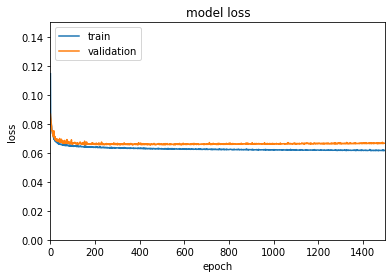

In [3]:
#Will create a large function to apply to the 4 CT Scans for each year.
parsee = ct_sheet.sheet_names[10]
data = ct_sheet.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['Case','Visit','ROI42','ROI117'], axis=1)  
#Get rid of subject names to only have features now. #Need to remove ROIs. They don't convert to floats.
#Get rid of ctx_rh_Medial_wall and ctx_lh_Medial_wall, not needed for analysis.
#Have to standardize data. Scikit learn here. Need to create stratified K folds to avoid uneven distribution of risk groups.pcaCT1Y = PCA(n_components=150) #150 Features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_features)

ct_sheet = pd.ExcelFile("SAAutoEncoder.xlsx") 
parsee = ct_sheet.sheet_names[0]
data = ct_sheet.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['ROI',11142,12142], axis=1)  
scaled_data = scaler.transform(data_features)

print(scaled_data.shape)
X_train, X_test = train_test_split(scaled_data, test_size=0.10, random_state=20)

#Size of encoded representation
input_size = 148
hidden_size3 = 119
hidden_size2 = 88
hidden_size1 = 57
encoding_dim = 27 # 13 floats -> compression of factor ~11.5, assuming the input is 150 floats

# Input Placeholder
input_data = Input(shape=(input_size,))
print(input_data)
# "encoded" is the encoded representation of the input
hidden_e_3 = Dense(hidden_size3, activation='tanh')(input_data)
hidden_e_2 = Dense(hidden_size2, activation='tanh')(hidden_e_3)
hidden_e_1 = Dense(hidden_size1, activation='tanh')(hidden_e_2) 
encoded = Dense(encoding_dim, activation='tanh')(hidden_e_1)
# "decoded" is the lossy reconstruction of the input
hidden_d_1 = Dense(hidden_size1, activation='tanh')(encoded)
hidden_d_2 = Dense(hidden_size2, activation='tanh')(hidden_d_1)
hidden_d_3 = Dense(hidden_size3, activation='tanh')(hidden_d_2)
decoded = Dense(input_size, activation='tanh')(hidden_d_3) #Decoded layers and activation function. Needs to return to 151.
# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)
# configure our model to use mean_absolute_error loss function, and the Adam optimizer:
autoencoder.compile(optimizer='Adam', loss='mean_absolute_error')

ac = autoencoder.fit(X_train, X_train,
epochs=1500,
batch_size=15,
shuffle=True,
validation_data=(X_test, X_test))

#print(ac.history.keys())
# "Loss"
plt.plot(ac.history['loss'])
plt.plot(ac.history['val_loss'])
#plt.set(xlim=(0, 50), ylim=(0.0, 1.0))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 1500, 0.0, 0.15])
plt.show()



Train on 603 samples, validate on 67 samples
Epoch 1/1500
603/603 [==============================] - 2s 3ms/step - loss: 0.2634 - val_loss: 0.1353
Epoch 2/1500
603/603 [==============================] - 0s 384us/step - loss: 0.1150 - val_loss: 0.1029
Epoch 3/1500
603/603 [==============================] - 0s 472us/step - loss: 0.0962 - val_loss: 0.0933
Epoch 4/1500
603/603 [==============================] - 0s 444us/step - loss: 0.0887 - val_loss: 0.0872
Epoch 5/1500
603/603 [==============================] - 0s 433us/step - loss: 0.0843 - val_loss: 0.0847
Epoch 6/1500
603/603 [==============================] - 0s 515us/step - loss: 0.0810 - val_loss: 0.0817
Epoch 7/1500
603/603 [==============================] - 0s 532us/step - loss: 0.0785 - val_loss: 0.0797
Epoch 8/1500
603/603 [==============================] - 0s 641us/step - loss: 0.0769 - val_loss: 0.0788
Epoch 9/1500
603/603 [==============================] - 0s 609us/step - loss: 0.0756 - val_loss: 0.0777
Epoch 10/1500
603/603

603/603 [==============================] - 1s 1ms/step - loss: 0.0695 - val_loss: 0.0723
Epoch 80/1500
603/603 [==============================] - 0s 518us/step - loss: 0.0694 - val_loss: 0.0725
Epoch 81/1500
603/603 [==============================] - 0s 778us/step - loss: 0.0694 - val_loss: 0.0722
Epoch 82/1500
603/603 [==============================] - 0s 619us/step - loss: 0.0693 - val_loss: 0.0725
Epoch 83/1500
603/603 [==============================] - 0s 635us/step - loss: 0.0694 - val_loss: 0.0722
Epoch 84/1500
603/603 [==============================] - 0s 795us/step - loss: 0.0693 - val_loss: 0.0724
Epoch 85/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0695 - val_loss: 0.0724
Epoch 86/1500
603/603 [==============================] - 1s 885us/step - loss: 0.0694 - val_loss: 0.0724
Epoch 87/1500
603/603 [==============================] - 0s 642us/step - loss: 0.0694 - val_loss: 0.0724
Epoch 88/1500
603/603 [==============================] - 0s 334us/step - 

603/603 [==============================] - 1s 1ms/step - loss: 0.0687 - val_loss: 0.0720
Epoch 157/1500
603/603 [==============================] - 0s 777us/step - loss: 0.0688 - val_loss: 0.0720
Epoch 158/1500
603/603 [==============================] - 0s 460us/step - loss: 0.0687 - val_loss: 0.0720
Epoch 159/1500
603/603 [==============================] - 0s 776us/step - loss: 0.0688 - val_loss: 0.0719
Epoch 160/1500
603/603 [==============================] - 0s 713us/step - loss: 0.0686 - val_loss: 0.0724
Epoch 161/1500
603/603 [==============================] - 1s 849us/step - loss: 0.0687 - val_loss: 0.0721
Epoch 162/1500
603/603 [==============================] - 1s 830us/step - loss: 0.0687 - val_loss: 0.0718
Epoch 163/1500
603/603 [==============================] - 0s 717us/step - loss: 0.0687 - val_loss: 0.0722
Epoch 164/1500
603/603 [==============================] - 1s 949us/step - loss: 0.0687 - val_loss: 0.0720
Epoch 165/1500
603/603 [==============================] - 0s 71

603/603 [==============================] - 0s 779us/step - loss: 0.0681 - val_loss: 0.0720
Epoch 234/1500
603/603 [==============================] - 1s 854us/step - loss: 0.0679 - val_loss: 0.0721
Epoch 235/1500
603/603 [==============================] - 0s 690us/step - loss: 0.0680 - val_loss: 0.0723
Epoch 236/1500
603/603 [==============================] - 0s 622us/step - loss: 0.0679 - val_loss: 0.0725
Epoch 237/1500
603/603 [==============================] - 0s 818us/step - loss: 0.0679 - val_loss: 0.0720
Epoch 238/1500
603/603 [==============================] - 1s 939us/step - loss: 0.0678 - val_loss: 0.0720
Epoch 239/1500
603/603 [==============================] - 0s 604us/step - loss: 0.0678 - val_loss: 0.0723
Epoch 240/1500
603/603 [==============================] - 0s 623us/step - loss: 0.0679 - val_loss: 0.0722
Epoch 241/1500
603/603 [==============================] - 0s 662us/step - loss: 0.0681 - val_loss: 0.0724
Epoch 242/1500
603/603 [==============================] - 0s 

603/603 [==============================] - 0s 410us/step - loss: 0.0672 - val_loss: 0.0724
Epoch 311/1500
603/603 [==============================] - 0s 430us/step - loss: 0.0671 - val_loss: 0.0724
Epoch 312/1500
603/603 [==============================] - 0s 466us/step - loss: 0.0672 - val_loss: 0.0724
Epoch 313/1500
603/603 [==============================] - 0s 676us/step - loss: 0.0670 - val_loss: 0.0726
Epoch 314/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0671 - val_loss: 0.0727
Epoch 315/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0671 - val_loss: 0.0724
Epoch 316/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0669 - val_loss: 0.0722
Epoch 317/1500
603/603 [==============================] - 0s 776us/step - loss: 0.0671 - val_loss: 0.0724
Epoch 318/1500
603/603 [==============================] - 0s 779us/step - loss: 0.0671 - val_loss: 0.0725
Epoch 319/1500
603/603 [==============================] - 0s 744us/

603/603 [==============================] - 0s 328us/step - loss: 0.0660 - val_loss: 0.0725
Epoch 388/1500
603/603 [==============================] - 0s 539us/step - loss: 0.0660 - val_loss: 0.0728
Epoch 389/1500
603/603 [==============================] - 0s 475us/step - loss: 0.0661 - val_loss: 0.0726
Epoch 390/1500
603/603 [==============================] - 0s 802us/step - loss: 0.0662 - val_loss: 0.0728
Epoch 391/1500
603/603 [==============================] - 0s 675us/step - loss: 0.0661 - val_loss: 0.0724
Epoch 392/1500
603/603 [==============================] - 0s 404us/step - loss: 0.0660 - val_loss: 0.0724
Epoch 393/1500
603/603 [==============================] - 0s 443us/step - loss: 0.0660 - val_loss: 0.0727
Epoch 394/1500
603/603 [==============================] - 0s 821us/step - loss: 0.0659 - val_loss: 0.0724
Epoch 395/1500
603/603 [==============================] - 0s 675us/step - loss: 0.0659 - val_loss: 0.0727
Epoch 396/1500
603/603 [==============================] - 0s 

Epoch 465/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0649 - val_loss: 0.0731
Epoch 466/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0650 - val_loss: 0.0728
Epoch 467/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0651 - val_loss: 0.0729
Epoch 468/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0650 - val_loss: 0.0730
Epoch 469/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0653 - val_loss: 0.0729
Epoch 470/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0649 - val_loss: 0.0729
Epoch 471/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0650 - val_loss: 0.0731
Epoch 472/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0650 - val_loss: 0.0726
Epoch 473/1500
603/603 [==============================] - 1s 940us/step - loss: 0.0650 - val_loss: 0.0731
Epoch 474/1500
603/603 [==============================] - 1s 8

603/603 [==============================] - 1s 852us/step - loss: 0.0640 - val_loss: 0.0733
Epoch 544/1500
603/603 [==============================] - 1s 832us/step - loss: 0.0639 - val_loss: 0.0734
Epoch 545/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0639 - val_loss: 0.0734
Epoch 546/1500
603/603 [==============================] - 1s 890us/step - loss: 0.0639 - val_loss: 0.0731
Epoch 547/1500
603/603 [==============================] - 1s 965us/step - loss: 0.0638 - val_loss: 0.0737
Epoch 548/1500
603/603 [==============================] - 0s 764us/step - loss: 0.0640 - val_loss: 0.0731
Epoch 549/1500
603/603 [==============================] - 1s 895us/step - loss: 0.0637 - val_loss: 0.0737
Epoch 550/1500
603/603 [==============================] - 1s 926us/step - loss: 0.0638 - val_loss: 0.0735
Epoch 551/1500
603/603 [==============================] - 0s 774us/step - loss: 0.0638 - val_loss: 0.0736
Epoch 552/1500
603/603 [==============================] - 1s 94

Epoch 621/1500
603/603 [==============================] - 0s 689us/step - loss: 0.0627 - val_loss: 0.0736
Epoch 622/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0627 - val_loss: 0.0740
Epoch 623/1500
603/603 [==============================] - 0s 693us/step - loss: 0.0628 - val_loss: 0.0736
Epoch 624/1500
603/603 [==============================] - 0s 713us/step - loss: 0.0627 - val_loss: 0.0740
Epoch 625/1500
603/603 [==============================] - 0s 768us/step - loss: 0.0628 - val_loss: 0.0737
Epoch 626/1500
603/603 [==============================] - 0s 774us/step - loss: 0.0627 - val_loss: 0.0737
Epoch 627/1500
603/603 [==============================] - 0s 672us/step - loss: 0.0627 - val_loss: 0.0739
Epoch 628/1500
603/603 [==============================] - 0s 663us/step - loss: 0.0627 - val_loss: 0.0737
Epoch 629/1500
603/603 [==============================] - 0s 694us/step - loss: 0.0627 - val_loss: 0.0741
Epoch 630/1500
603/603 [========================

603/603 [==============================] - 0s 803us/step - loss: 0.0617 - val_loss: 0.0741
Epoch 699/1500
603/603 [==============================] - 0s 735us/step - loss: 0.0616 - val_loss: 0.0743
Epoch 700/1500
603/603 [==============================] - 1s 853us/step - loss: 0.0617 - val_loss: 0.0740
Epoch 701/1500
603/603 [==============================] - 0s 810us/step - loss: 0.0616 - val_loss: 0.0741
Epoch 702/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0617 - val_loss: 0.0744
Epoch 703/1500
603/603 [==============================] - 0s 782us/step - loss: 0.0615 - val_loss: 0.0739
Epoch 704/1500
603/603 [==============================] - 0s 699us/step - loss: 0.0615 - val_loss: 0.0741
Epoch 705/1500
603/603 [==============================] - 0s 696us/step - loss: 0.0615 - val_loss: 0.0740
Epoch 706/1500
603/603 [==============================] - 1s 855us/step - loss: 0.0615 - val_loss: 0.0741
Epoch 707/1500
603/603 [==============================] - 0s 71

Epoch 776/1500
603/603 [==============================] - 2s 3ms/step - loss: 0.0606 - val_loss: 0.0746
Epoch 777/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0606 - val_loss: 0.0747
Epoch 778/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0607 - val_loss: 0.0745
Epoch 779/1500
603/603 [==============================] - 1s 911us/step - loss: 0.0607 - val_loss: 0.0747
Epoch 780/1500
603/603 [==============================] - 0s 713us/step - loss: 0.0606 - val_loss: 0.0745
Epoch 781/1500
603/603 [==============================] - 0s 714us/step - loss: 0.0606 - val_loss: 0.0748
Epoch 782/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0606 - val_loss: 0.0747
Epoch 783/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0604 - val_loss: 0.0743
Epoch 784/1500
603/603 [==============================] - 1s 953us/step - loss: 0.0603 - val_loss: 0.0747
Epoch 785/1500
603/603 [==============================] 

603/603 [==============================] - 0s 711us/step - loss: 0.0597 - val_loss: 0.0749
Epoch 855/1500
603/603 [==============================] - 1s 843us/step - loss: 0.0595 - val_loss: 0.0755
Epoch 856/1500
603/603 [==============================] - 0s 756us/step - loss: 0.0595 - val_loss: 0.0752
Epoch 857/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0596 - val_loss: 0.0754
Epoch 858/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0596 - val_loss: 0.0752
Epoch 859/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0595 - val_loss: 0.0751
Epoch 860/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0595 - val_loss: 0.0753
Epoch 861/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0595 - val_loss: 0.0754
Epoch 862/1500
603/603 [==============================] - 1s 963us/step - loss: 0.0594 - val_loss: 0.0753
Epoch 863/1500
603/603 [==============================] - 0s 825us/step

603/603 [==============================] - 0s 797us/step - loss: 0.0586 - val_loss: 0.0753
Epoch 932/1500
603/603 [==============================] - 1s 847us/step - loss: 0.0586 - val_loss: 0.0755
Epoch 933/1500
603/603 [==============================] - 0s 676us/step - loss: 0.0586 - val_loss: 0.0754
Epoch 934/1500
603/603 [==============================] - 1s 849us/step - loss: 0.0585 - val_loss: 0.0755
Epoch 935/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0586 - val_loss: 0.0753
Epoch 936/1500
603/603 [==============================] - 0s 812us/step - loss: 0.0588 - val_loss: 0.0756
Epoch 937/1500
603/603 [==============================] - 0s 709us/step - loss: 0.0585 - val_loss: 0.0756
Epoch 938/1500
603/603 [==============================] - 0s 777us/step - loss: 0.0585 - val_loss: 0.0756
Epoch 939/1500
603/603 [==============================] - 0s 759us/step - loss: 0.0586 - val_loss: 0.0752
Epoch 940/1500
603/603 [==============================] - 0s 73

603/603 [==============================] - 0s 751us/step - loss: 0.0578 - val_loss: 0.0762
Epoch 1009/1500
603/603 [==============================] - 0s 721us/step - loss: 0.0578 - val_loss: 0.0761
Epoch 1010/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0578 - val_loss: 0.0758
Epoch 1011/1500
603/603 [==============================] - 0s 594us/step - loss: 0.0577 - val_loss: 0.0761
Epoch 1012/1500
603/603 [==============================] - 0s 624us/step - loss: 0.0576 - val_loss: 0.0760
Epoch 1013/1500
603/603 [==============================] - 0s 642us/step - loss: 0.0578 - val_loss: 0.0765
Epoch 1014/1500
603/603 [==============================] - 0s 609us/step - loss: 0.0578 - val_loss: 0.0761
Epoch 1015/1500
603/603 [==============================] - 1s 980us/step - loss: 0.0579 - val_loss: 0.0763
Epoch 1016/1500
603/603 [==============================] - 0s 584us/step - loss: 0.0576 - val_loss: 0.0763
Epoch 1017/1500
603/603 [==============================

Epoch 1085/1500
603/603 [==============================] - 0s 732us/step - loss: 0.0570 - val_loss: 0.0766
Epoch 1086/1500
603/603 [==============================] - 0s 781us/step - loss: 0.0570 - val_loss: 0.0765
Epoch 1087/1500
603/603 [==============================] - 0s 769us/step - loss: 0.0569 - val_loss: 0.0769
Epoch 1088/1500
603/603 [==============================] - 0s 789us/step - loss: 0.0570 - val_loss: 0.0769
Epoch 1089/1500
603/603 [==============================] - 0s 714us/step - loss: 0.0568 - val_loss: 0.0768
Epoch 1090/1500
603/603 [==============================] - 1s 846us/step - loss: 0.0569 - val_loss: 0.0767
Epoch 1091/1500
603/603 [==============================] - 1s 895us/step - loss: 0.0571 - val_loss: 0.0765
Epoch 1092/1500
603/603 [==============================] - 1s 836us/step - loss: 0.0568 - val_loss: 0.0765
Epoch 1093/1500
603/603 [==============================] - 0s 619us/step - loss: 0.0569 - val_loss: 0.0765
Epoch 1094/1500
603/603 [============

603/603 [==============================] - 1s 2ms/step - loss: 0.0563 - val_loss: 0.0776
Epoch 1162/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0561 - val_loss: 0.0777
Epoch 1163/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0563 - val_loss: 0.0776
Epoch 1164/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0560 - val_loss: 0.0775
Epoch 1165/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0561 - val_loss: 0.0777
Epoch 1166/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0562 - val_loss: 0.0777
Epoch 1167/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0561 - val_loss: 0.0775
Epoch 1168/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0562 - val_loss: 0.0774
Epoch 1169/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0562 - val_loss: 0.0778
Epoch 1170/1500
603/603 [==============================] - 1s 2ms/step 

603/603 [==============================] - 0s 706us/step - loss: 0.0555 - val_loss: 0.0779
Epoch 1239/1500
603/603 [==============================] - 0s 787us/step - loss: 0.0554 - val_loss: 0.0781
Epoch 1240/1500
603/603 [==============================] - 0s 689us/step - loss: 0.0553 - val_loss: 0.0781
Epoch 1241/1500
603/603 [==============================] - 0s 670us/step - loss: 0.0554 - val_loss: 0.0785
Epoch 1242/1500
603/603 [==============================] - 0s 678us/step - loss: 0.0553 - val_loss: 0.0784
Epoch 1243/1500
603/603 [==============================] - 0s 733us/step - loss: 0.0552 - val_loss: 0.0783
Epoch 1244/1500
603/603 [==============================] - 0s 796us/step - loss: 0.0554 - val_loss: 0.0780
Epoch 1245/1500
603/603 [==============================] - 1s 843us/step - loss: 0.0554 - val_loss: 0.0783
Epoch 1246/1500
603/603 [==============================] - 0s 771us/step - loss: 0.0553 - val_loss: 0.0779
Epoch 1247/1500
603/603 [============================

Epoch 1315/1500
603/603 [==============================] - 0s 742us/step - loss: 0.0545 - val_loss: 0.0785
Epoch 1316/1500
603/603 [==============================] - 0s 818us/step - loss: 0.0546 - val_loss: 0.0788
Epoch 1317/1500
603/603 [==============================] - 1s 1000us/step - loss: 0.0545 - val_loss: 0.0784
Epoch 1318/1500
603/603 [==============================] - 0s 661us/step - loss: 0.0545 - val_loss: 0.0786
Epoch 1319/1500
603/603 [==============================] - 1s 837us/step - loss: 0.0546 - val_loss: 0.0785
Epoch 1320/1500
603/603 [==============================] - 0s 762us/step - loss: 0.0545 - val_loss: 0.0786
Epoch 1321/1500
603/603 [==============================] - 0s 821us/step - loss: 0.0546 - val_loss: 0.0787
Epoch 1322/1500
603/603 [==============================] - 0s 732us/step - loss: 0.0545 - val_loss: 0.0785
Epoch 1323/1500
603/603 [==============================] - 0s 799us/step - loss: 0.0545 - val_loss: 0.0784
Epoch 1324/1500
603/603 [===========

Epoch 1392/1500
603/603 [==============================] - 0s 674us/step - loss: 0.0538 - val_loss: 0.0793
Epoch 1393/1500
603/603 [==============================] - 0s 749us/step - loss: 0.0541 - val_loss: 0.0792
Epoch 1394/1500
603/603 [==============================] - 0s 751us/step - loss: 0.0541 - val_loss: 0.0793
Epoch 1395/1500
603/603 [==============================] - 0s 818us/step - loss: 0.0538 - val_loss: 0.0792
Epoch 1396/1500
603/603 [==============================] - 1s 875us/step - loss: 0.0538 - val_loss: 0.0791
Epoch 1397/1500
603/603 [==============================] - 0s 776us/step - loss: 0.0538 - val_loss: 0.0789
Epoch 1398/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0536 - val_loss: 0.0792
Epoch 1399/1500
603/603 [==============================] - 1s 918us/step - loss: 0.0537 - val_loss: 0.0789
Epoch 1400/1500
603/603 [==============================] - 1s 882us/step - loss: 0.0536 - val_loss: 0.0797
Epoch 1401/1500
603/603 [==============

603/603 [==============================] - 1s 2ms/step - loss: 0.0532 - val_loss: 0.0794
Epoch 1469/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0534 - val_loss: 0.0792 - ETA: 1s 
Epoch 1470/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0531 - val_loss: 0.0797
Epoch 1471/1500
603/603 [==============================] - 1s 2ms/step - loss: 0.0532 - val_loss: 0.0795
Epoch 1472/1500
603/603 [==============================] - 2s 3ms/step - loss: 0.0532 - val_loss: 0.0797
Epoch 1473/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0532 - val_loss: 0.0802
Epoch 1474/1500
603/603 [==============================] - 1s 1ms/step - loss: 0.0533 - val_loss: 0.0796
Epoch 1475/1500
603/603 [==============================] - 0s 816us/step - loss: 0.0532 - val_loss: 0.0799
Epoch 1476/1500
603/603 [==============================] - 1s 922us/step - loss: 0.0533 - val_loss: 0.0791
Epoch 1477/1500
603/603 [==============================]

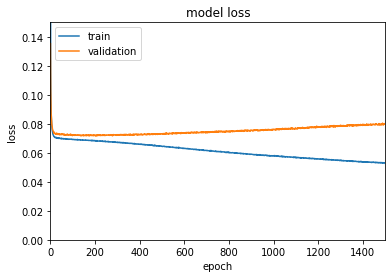

In [49]:
sa_data = pd.ExcelFile("SAAutoencoderGilmore.xlsx") 
parsee = sa_data.sheet_names[0]
data = sa_data.parse(parsee)
data_features = data.loc[:, data.columns] 
data_features = data_features.drop(['ROI',11142,12142], axis=1)  
scaled_data = scaler.transform(data_features)

encoder = Model(input_data, encoded)
encoded_data = encoder.predict(scaled_data)
#I now have scaled data as encoded which is my input. This will compare predictions to my scaled_data.
Y_train, Y_test = train_test_split(scaled_data, test_size=0.10, random_state=20) #Scaled data I want to compare to
X_train, X_test = train_test_split(encoded_data, test_size=0.10, random_state=20) #Encoded data I will input

dinput_size = 27
hidden_size1 = 57
hidden_size2 = 88
hidden_size3 = 119
decoded_dim = 148
dinput_data = Input(shape=(dinput_size,))
dhidden_d_1 = Dense(hidden_size1, activation='tanh')(dinput_data)
dhidden_d_2 = Dense(hidden_size2, activation='tanh')(dhidden_d_1)
dhidden_d_3 = Dense(hidden_size3, activation='tanh')(dhidden_d_2)
predictedSA = Dense(decoded_dim, activation='tanh')(dhidden_d_3)

predictor = Model(dinput_data, predictedSA)
predictor.compile(optimizer='Adam', loss='mean_absolute_error')
pn = predictor.fit(X_train, Y_train,
epochs=1500,
batch_size=15,
shuffle=True,
validation_data=(X_test, Y_test))

#print(ac.history.keys())
# "Loss"
plt.plot(pn.history['loss'])
plt.plot(pn.history['val_loss'])
#plt.set(xlim=(0, 50), ylim=(0.0, 1.0))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.axis([0, 1500, 0.0, 0.15])
plt.show()